# Linear Regression (One Variable)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#!pip install tqdm

In [2]:
def UTIL_FeatureNormalization (X,debug=False):
    # X is a pandad dataframe
    
    if debug:
        print('Input Data',X.head())
        print(X.describe())
    X_norm = (X - X.mean()) / X.std ()
    if debug:
        print('Output Data',X_norm.head())
    return X_norm


In [3]:
from tqdm import tqdm

def run_experiment (X,Y,vtheta,experiment_parameters):
    iterations = []
    for iteration in range(1,len(experiment_parameters['learning_rate'])+1):
        lr = experiment_parameters['learning_rate'][iteration-1]
        costs = []
        for i in tqdm(range (experiment_parameters['steps']),desc='LR = ' + str(lr)):
            prediction = LR_predict (X,vtheta)
            cost = LR_CostFunction (prediction,Y)
            costs.append (cost)
            vgrads = LR_CalculateGrads (X,vtheta,Y)
            vtheta = LR_UpdateThetas (vtheta,m,vgrads,lr)
        iterations.append (costs)
    return iterations , vtheta

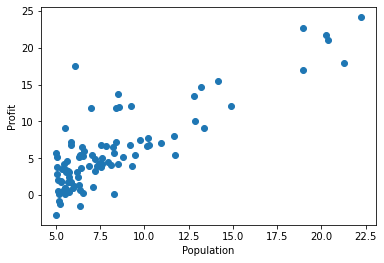

In [4]:
# Leer los datos y visualizar

import pandas as pd

dataset =pd.read_csv('ex1data1.txt', sep=',',header=None)  # población, beneficio
#dataset_norm = UTIL_FeatureNormalization (dataset)
population = dataset.values [:,0:1]
profit = dataset.values [:,1:2]

data = {'a': population.reshape ((1,dataset.shape[0])),
        'b':profit.reshape((1,dataset.shape[0]))
       }
plt.scatter('a', 'b', data=data)
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

## Hipótesis

$ h(\theta) = \theta_0 + \theta_1 * x_1 + \theta_2 * x_2 ..$

In [5]:
from sklearn.metrics import mean_squared_error, r2_score


def LR_initVTheta (n_variables,type='random'):
    """
    Inicializacion de theta, 
    n_variables es el número de variables que se usarán en la regresión lineal
    """
    if type == 'random':
        return np.random.randn (1 , n_variables + 1)
    else:
        return np.zeros((1,n_variables +1))
    
def LR_predict (x,theta):
    """
    Predicción lineal,
    X es la matriz con las muestras .Dimensión  (m,n) donde m es el número de muestras y n el número de features
    theta es el vector de Thetas [tHeta0,theta1,theta2 ...]. Dimensión (1,n), siendo n el número de features
    """
    assert x.shape[1] == theta.shape[1]
    assert theta.shape [0] == 1
    return np.dot (x,theta.T)

def LR_getXMatrix (x):
    """
    Obtener matriz X para posterior pocesamiento, se añade una columna de '1'
    X es la matriz con las muestras
    """
    m = x.shape[0] # Número de muestras
    Ones = np.ones ((1,m)).T
    return np.insert (x,0,1, axis=1)

def LR_CostFunction (prediction,y):
    m = prediction.shape [0]
    assert prediction.shape[1] == 1
    assert y.shape[1] == 1
    assert prediction.shape[0] == y.shape[0]
    J = 1/ (2 * m) *  np.sum (np.power ((prediction-y),2)) 
    return J

def LR_CalculateGrads (x,vtheta,y):
    prediction = LR_predict (x,vtheta)
    m = x.shape[0]
    n = vtheta.shape [1]
    y = y.reshape (m,1)
    assert prediction.shape == y.shape
    error = prediction - y
    error = np.array (error).reshape(1, m)
    return error.dot (x)

def LR_CalculateGrads_NOTVALID (x,vtheta,y):
    prediction = LR_predict (x,vtheta)
    n = vtheta.shape [1]
    vgrads = np.zeros ((1,n))                      # Vector dimensión (1,n)
    for i in range (n):
        xj = x[:,i:i+1]                            # xj = todos los valores x (muestras) de la feature j
                                                   # se asume que x0 para cualquiera de las muestras es siempre 1
        grad = np.sum ((prediction - y ) * xj )    # element wise product, 
        vgrads [0][i] = grad        
    assert vtheta.shape[1] == vgrads.shape[1]
    return np.array(vgrads)

def LR_UpdateThetas (vtheta,m,vgrads,learning_rate=1e-2):
    #print ('Vtheta antes ',vtheta)
    #print ('VGrads ' , vgrads)
    vtheta = vtheta - ( 1 / m ) * learning_rate * vgrads
    #print ('Vtheta después ' , vtheta)
    return vtheta

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

experiment_parameters = {'learning_rate' : [1e-5],
                         'steps': 10000 }

n_variables = dataset.shape [1] - 1           # elimino Y
m = dataset.shape [0]                         # número de muestras
vtheta = LR_initVTheta (n_variables)
X = LR_getXMatrix (population)
print ('#Variables {}, #muestras {},X shape {}, Y shape {},Theta shape {} '.format(n_variables,m,X.shape,profit.shape,vtheta.shape),flush=True)
iterations,_ = run_experiment (X,profit,vtheta,experiment_parameters)
prediction = LR_predict (X,vtheta)
mean_squared_error = np.mean(np.power((profit - prediction), 2))

print("Mean squared error: %.2f" % mean_squared_error)
print("R2 score: %.2f" % r2_score(profit,prediction))



#Variables 1, #muestras 97,X shape (97, 2), Y shape (97, 1),Theta shape (1, 2) 


LR = 1e-05: 100%|█████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 16458.64it/s]

Mean squared error: 45.08
R2 score: -0.50


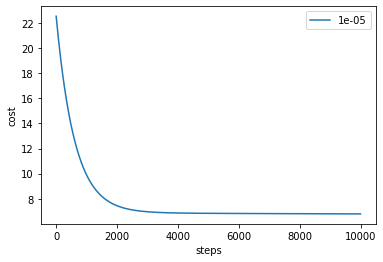

In [7]:
# Plotting costs

steps = np.arange (experiment_parameters['steps'])
for iteration in range(len(iterations)):
    costs = iterations[iteration]
    plt.plot( steps , costs,label=str(experiment_parameters['learning_rate'][iteration]))

plt.xlabel('steps')
plt.ylabel('cost')
plt.legend()
plt.show()

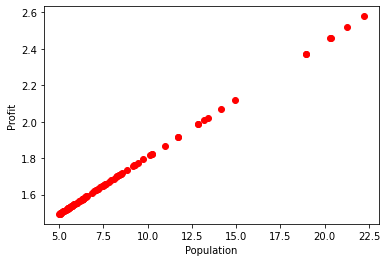

In [8]:
prediction = LR_predict (X,vtheta)

data = {'a': population.reshape ((1,dataset.shape[0])),
        'b':prediction.reshape((1,dataset.shape[0]))
       }
plt.scatter('a', 'b', c='red',data=data)
plt.xlabel('Population')
plt.ylabel('Profit')
#plt.plot(population.reshape ((1,dataset.shape[0])), prediction.reshape ((1,dataset.shape[0])), 'r--')
plt.show()


# Linear Regression (Multiple Variables)

In [9]:
dataset =pd.read_csv('ex1data2.txt', sep=',',header=None)  # size of house, #bedrooms,price
# Cuando las escalas de las features son muy diferentes, normalizamos para que GD converja antes
dataset_norm = UTIL_FeatureNormalization (dataset)
X_norm = dataset_norm.values [:,0:2]
price = dataset.values  [:,2:3]

#Variables 2, #muestras 47,Theta shape (1, 2) 


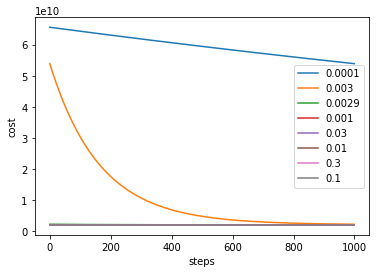

In [10]:

experiment_parameters = {'learning_rate' : [1e-4,3e-3,2.9e-3,1e-3,3e-2,1e-2,3e-1,1e-1],
                         'steps' : 1000 }

n_variables = dataset.shape [1] - 1           # elimino Y
m = dataset.shape [0]                         # número de muestras
print ('#Variables {}, #muestras {},Theta shape {} '.format(n_variables,m,vtheta.shape))
vtheta = LR_initVTheta (n_variables)
X = LR_getXMatrix (X_norm)
learning_rate = 0.003
steps = 1000
iterations = []
for iteration in range(len(experiment_parameters['learning_rate'])):
    lr = experiment_parameters['learning_rate'][iteration]
    costs = []
    for i in range (experiment_parameters['steps']):
        prediction = LR_predict (X,vtheta)
        cost = LR_CostFunction (prediction,price)
        costs.append (cost)
        vgrads = LR_CalculateGrads (X,vtheta,price)
        vtheta = LR_UpdateThetas (vtheta,m,vgrads,lr)
    iterations.append (costs)
    
steps = np.arange (experiment_parameters['steps'])
for iteration in range(len(iterations)):
    costs = iterations[iteration]
    plt.plot( steps , costs,label=str(experiment_parameters['learning_rate'][iteration]))

plt.xlabel('steps')
plt.ylabel('cost')
plt.legend()
plt.show()

# Polynomial Regression - adding features

LR = 0.3:   0%|                                                                               | 0/1000 [00:00<?, ?it/s]

        0  sqrt-population        1
0  6.1101         2.471862  17.5920
1  5.5277         2.351106   9.1302
2  8.5186         2.918664  13.6620
3  7.0032         2.646356  11.8540
4  5.8598         2.420702   6.8233
#Variables 2, #muestras 97,Theta shape (1, 3) 


LR = 0.3: 100%|█████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 13668.59it/s]


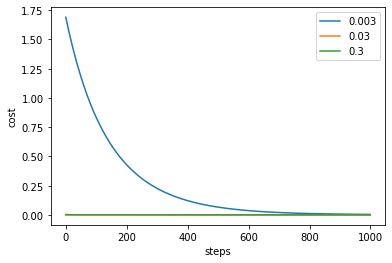

In [11]:
import pandas as pd

dataset =pd.read_csv('ex1data1.txt', sep=',',header=None)  # población, beneficio

# Crearemos una nueva feature que sea la raiz cuadrada de la población
population_sqrt = np.sqrt(dataset.values[:,0:1])
dataset.insert(1, "sqrt-population", population_sqrt, True)
print (dataset.head())

# Normalizamos el dataset

dataset_norm = UTIL_FeatureNormalization (dataset)
X_norm = dataset_norm.values[:,0:2]

profit = dataset.values [:,1:2]


n = X_norm.shape [1]                         # número de features
m = dataset.shape [0]                         # número de muestras
vtheta = LR_initVTheta (n)
print ('#Variables {}, #muestras {},Theta shape {} '.format(n,m,vtheta.shape))
X = LR_getXMatrix (X_norm)

experiment_parameters = {'learning_rate' : [0.003,0.03,0.3],
                         'steps' :1000 }

iterations,_ = run_experiment (X,profit,vtheta,experiment_parameters)

steps = np.arange (experiment_parameters['steps'])
for iteration in range(len(iterations)):
    costs = iterations[iteration]
    plt.plot( steps , costs,label=str(experiment_parameters['learning_rate'][iteration]))

plt.xlabel('steps')
plt.ylabel('cost')
plt.legend()
plt.show()

## Normal Equation 

  $$\theta = (X^TX)^{-1}X^TY$$

Forma de obtener Theta que minimiza J(Theta), sin GD
    
* Es muy lenta si el número de features es muy elevado (n>10000)
* La matriz inversa puede no existir si alguna de las features es linearmente dependiente de otras
* No necesita scaling (normalización)

In [12]:
import pandas as pd

dataset =pd.read_csv('ex1data1.txt', sep=',',header=None)  # población, beneficio

# Crearemos una nueva feature que sea la raiz cuadrada de la población
population_sqrt = np.sqrt(dataset.values[:,0:1])
dataset.insert(1, "sqrt-population", population_sqrt, True)
print (dataset.head())

X_ = dataset_norm.values[:,0:2]
Y = dataset.values [:,1:2]
X = LR_getXMatrix (X_)
step1 = np.dot(X.T,X)
step2 = np.linalg.inv(step1)
step3 = np.dot (step2,X.T)
theta = np.dot(step3,Y)
print (theta)

        0  sqrt-population        1
0  6.1101         2.471862  17.5920
1  5.5277         2.351106   9.1302
2  8.5186         2.918664  13.6620
3  7.0032         2.646356  11.8540
4  5.8598         2.420702   6.8233
[[2.79640422e+00]
 [1.85962357e-14]
 [5.86058278e-01]]


$ \sum \limits _{i=1} ^{10} \int \limits _0 ^{\infty} e^{\nu _i x } dx $  
$ \sqrt{x+y}, \log, \ln, \sin, \cos, \tan, \sec, \sinh ,\leq, \geq, \approx, \equiv, \neq, <, >  $

# Using minibatches

Numero de features  1
Numero total de muestras  97


LR = 0.00021: 100%|███████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 16490.31it/s]


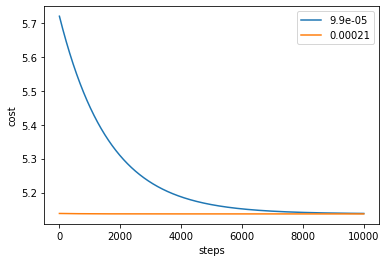

In [13]:
# Leer los datos y visualizar

import pandas as pd

dataset =pd.read_csv('ex1data1.txt', sep=',',header=None)  # población, beneficio
population = dataset.values [:,0:1]
profit = dataset.values [:,1:2]

n = population.shape [1]                    # número de features
print ('Numero de features ',n)
m = dataset.shape [0]                         # número de muestras
print ('Numero total de muestras ',m,flush=True)
vtheta = LR_initVTheta (n)
X_new = LR_getXMatrix (population)          # Añadimos 1's para theta0

# Dividir datos entre training y test data

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_new,profit,test_size=0.1,random_state=50)

# Creamos minibatch para la fase de training

import sys
sys.path.append('../')
from src.utils import UTIL_random_mini_batches 

minibatches = UTIL_random_mini_batches (X_train.T,Y_train.T, mini_batch_size=2**4)
experiment_parameters = {'learning_rate' : [0.000099,0.00021],
                         'steps' :10000 }

for (X,Y) in minibatches:
    iterations, vtheta = run_experiment (X.T,Y.T,vtheta,experiment_parameters)


steps = np.arange (experiment_parameters['steps'])
for iteration in range(len(iterations)):
    costs = iterations[iteration]
    plt.plot( steps , costs,label=str(experiment_parameters['learning_rate'][iteration]))

plt.xlabel('steps')
plt.ylabel('cost')
plt.legend()
plt.show()

# SKLEARN DATA SET EXAMPLE - DIABETES

LR = 0.1: 100%|████████████████████████████████████████████████████████████████| 20000/20000 [00:02<00:00, 9169.37it/s]


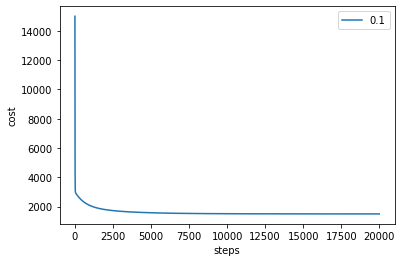

In [17]:
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import sys
sys.path.append('../')


diabetes_x,diabetes_y = datasets.load_diabetes(return_X_y=True)
n = diabetes_x.shape [1]                         # número de features
m = diabetes_x.shape [0]                         # número de muestras
vtheta = LR_initVTheta (n)                       # Inicializo vtheta

X_new = LR_getXMatrix (diabetes_x)          # Añadimos 1's para theta0

# Dividir datos entre training y test data

X_train,X_test,Y_train,Y_test = train_test_split(X_new,diabetes_y,test_size=0.1,random_state=50)
Y_train = np.array(Y_train).reshape ((X_train.shape[0],1))

experiment_parameters = {'learning_rate' : [0.1],
                         'steps' :20000 }

iterations, vtheta = run_experiment (X_train,Y_train,vtheta,experiment_parameters)
  
steps = np.arange (experiment_parameters['steps'])
for iteration in range(len(iterations)):
    costs = iterations[iteration]
    plt.plot( steps , costs,label=str(experiment_parameters['learning_rate'][iteration]))

plt.xlabel('steps')
plt.ylabel('cost')
plt.legend()
plt.show()

In [18]:
print (vtheta)
diabetes_y_predict = LR_predict (X_test,vtheta)
print ('Mean Squared Error: %.2f' % mean_squared_error(Y_test,diabetes_y_predict))
print ('Coefficient of determination: %.2f' % r2_score(Y_test,diabetes_y_predict))

[[ 152.06852041    4.81888518 -257.89915046  520.11481086  308.86125633
   -48.97895116  -97.68436293 -202.73789573  124.97023733  443.84322469
    89.31584722]]
Mean Squared Error: 1934.22
Coefficient of determination: 0.59


In [19]:
X = X_train
Y = Y_train
step1 = np.dot(X.T,X)
step2 = np.linalg.inv(step1)
step3 = np.dot (step2,X.T)
theta = np.array(np.dot(step3,Y)).reshape (1,X.shape[1])
diabetes_y_predict = LR_predict (X_test,theta)
print (theta)
print ('Mean Squared Error: %.2f' % mean_squared_error(Y_test,diabetes_y_predict))
print ('Coefficient of determination: %.2f ' % r2_score(Y_test,diabetes_y_predict))

[[ 152.01195696    2.87985745 -271.6307714   516.97865631  320.2430435
  -906.3230666   587.33809209  170.7351007   212.00453981  790.92969968
    66.11228379]]
Mean Squared Error: 1996.48
Coefficient of determination: 0.57 
